# **Exploring Hikaru Dataset Metadata**

## 0. Analysis setup

In [102]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../Core')
sys.path.append('../Utils')

# Import data classes
from metadata import MetaData
from movedata import MoveData

# Import cleaner classes
from data_cleaning import MetaDataCleaner

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

## 1. Load move and metadata

In [46]:
from joblib import load
import pandas as pd

# Load the moves dictionary
hikaru_mv_dict = load('../Data/hikaru_moves_dictionary.joblib')

# Load the metadata dataframe
hikaru_meta_df_raw = pd.read_csv('../Data/hikaru_metadata_dataframe.csv', index_col='Game_ID')
hikaru_meta_df = MetaDataCleaner.clean_metadata(hikaru_meta_df_raw)

## 2. Quick data check

### I. Metadata

In [47]:
display(hikaru_meta_df.iloc[9700:9703])

,Event,Site,Date,Round,White,Black,Result,CurrentPosition,Timezone,ECO,...,TimeControl,Termination,StartTime,EndDate,EndTime,Link,SetUp,FEN,Variant,Tournament
Game_ID,,,,,,,,,,,,,,,,,,,,,
9701,Live Chess,Chess.com,NaT,<NA>,Hikaru,Keranke,1-0,3r2k1/p2P1p1p/6p1/4q3/8/1P3P2/P2Q2PP/3R2K1 b - -,UTC,A01,...,60,Hikaru won by resignation,0 days 16:32:22,NaT,0 days 16:33:32,https://www.chess.com/game/live/1628869910,<NA>,<NA>,<NA>,<NA>
9702,Live Chess,Chess.com,NaT,<NA>,Keranke,Hikaru,0-1,r1q1k1nr/ppp1pp2/3p2p1/1P5p/2P5/2bP1PP1/P4PKP/...,UTC,A10,...,60,Hikaru won by resignation,0 days 16:33:41,NaT,0 days 16:34:06,https://www.chess.com/game/live/1628871326,<NA>,<NA>,<NA>,<NA>
9703,Live Chess,Chess.com,NaT,<NA>,Hikaru,Keranke,1-0,r3r3/p1B2kpp/1p6/3P1p2/2P1n3/1P2P1PP/P1R3K1/R7...,UTC,A01,...,60,Hikaru won by resignation,0 days 16:34:16,NaT,0 days 16:35:17,https://www.chess.com/game/live/1628871923,<NA>,<NA>,<NA>,<NA>


In [48]:
print(hikaru_meta_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50146 entries, 1 to 50146
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Event            50130 non-null  string         
 1   Site             50130 non-null  string         
 2   Date             0 non-null      datetime64[ns] 
 3   Round            0 non-null      Int64          
 4   White            50130 non-null  string         
 5   Black            50130 non-null  string         
 6   Result           50146 non-null  string         
 7   CurrentPosition  50130 non-null  string         
 8   Timezone         50130 non-null  string         
 9   ECO              49676 non-null  string         
 10  ECOUrl           49676 non-null  string         
 11  UTCDate          0 non-null      datetime64[ns] 
 12  UTCTime          50130 non-null  timedelta64[ns]
 13  WhiteElo         50130 non-null  Int64          
 14  BlackElo         50130 non-

## 3. Metadata Column Exploration

### I. Event

In [49]:
# Unique Event values
print(f'Unique event values: {hikaru_meta_df['Event'].nunique()}')
# event_count = hikaru_meta_df['Event'].value_counts()
# for count in event_count:
#     print(count)

print(f'Event value counts: \n{hikaru_meta_df['Event'].value_counts().head(7)}')

Unique event values: 20
Event value counts: 
Event
Live Chess                       48063
Live Chess - Odds Chess            777
Live Chess - Chess960              704
Let's Play!                        174
Live Chess - Three-Check           167
Live Chess - Crazyhouse            140
Live Chess - King of the Hill       91
Name: count, dtype: Int64


### II. Site

In [53]:
print(f'Number of unique sites: {hikaru_meta_df['Site'].nunique()}\n')
print(f'Site counts:')
print(hikaru_meta_df['Site'].value_counts())
print('\nAll sites are from chess.com and therefore will be removed')
hikaru_meta_df_2 = hikaru_meta_df.drop('Site',axis=1,errors='ignore')

Number of unique sites: 1

Site counts:
Site
Chess.com    50130
Name: count, dtype: Int64

All sites are from chess.com and therefore will be removed


### III. Date

In [51]:
# Dates are parsed incorrectly by cleaner class method. Needs fixing

### IV. Round

In [58]:
print(f'Number of unique round values: {hikaru_meta_df_2['Round'].nunique()}')
print('\nRound value:')
print(hikaru_meta_df_2['Round'].value_counts())
print('\nAll rounds are NaN and therefore will be removed')
hikaru_meta_df_3 = hikaru_meta_df_2.drop('Round', axis=1, errors='ignore')

Number of unique round values: 0

Round value:
Series([], Name: count, dtype: Int64)

All rounds are NaN and therefore will be removed


### V. White and Black

In [ ]:
# Numeric insights
print(f'Unique competitors playing white: {hikaru_meta_df_3['White'].nunique()}')
print(f'Unique competitors playing black: {hikaru_meta_df_3['Black'].nunique()}')
print()

print('Hikaru oppenent playing white frequencies:')
print(hikaru_meta_df_3['White'].value_counts()[1:11])
print()

print('Hikaru opponent playing black relative frequencies:')
print(hikaru_meta_df_3['Black'].value_counts(normalize=True)[1:11]*100)
print()

Unique competitors playing white: 3116
Unique competitors playing black: 3387

Hikaru oppenent playing white frequencies:
White
DanielNaroditsky     1292
Firouzja2003          803
hansen                654
penguingm1            546
Yaacovn               542
Bigfish1995           486
wonderfultime         459
Oleksandr_Bortnyk     424
Jospem                365
Robert_Chessmood      335
Name: count, dtype: Int64

Hikaru opponent playing black relative frequencies:
Black
DanielNaroditsky     2.571315
Firouzja2003          1.60383
hansen               1.314582
penguingm1           1.101137
Yaacovn              1.089168
Bigfish1995          0.983443
wonderfultime        0.923599
Oleksandr_Bortnyk    0.865749
Jospem               0.738081
Robert_Chessmood     0.666268
Name: proportion, dtype: Float64



In [90]:
# Problem adding pandas Series
print('Top 10 Hikaru opponent counts:')
opp_count_preview = hikaru_meta_df_3['White'].value_counts()[1:11] + hikaru_meta_df_3['Black'].value_counts()[1:11]
print(opp_count_preview)
print()

print('All Hikaru opponent counts:')
opp_count_full = hikaru_meta_df_3['White'].value_counts() + hikaru_meta_df_3['Black'].value_counts()
print(opp_count_full.head(10))

Top 10 Hikaru opponent counts:
White
DanielNaroditsky     2581
Firouzja2003         1607
hansen               1313
penguingm1           1098
Yaacovn              1088
Bigfish1995           979
wonderfultime         922
Oleksandr_Bortnyk     858
Jospem                735
Robert_Chessmood      669
Name: count, dtype: Int64

All Hikaru opponent counts:
00venom00      <NA>
02400boyyy     <NA>
07Jalchess       12
09drew            2
0Cole          <NA>
0gZPanda        220
11181966       <NA>
123chess123    <NA>
12teen           81
13MiRacLe      <NA>
Name: count, dtype: Int64


In [97]:
# Solution to pandas Series problem
opp_count = (
    hikaru_meta_df_3['White'].value_counts()[1:]
    .add(hikaru_meta_df_3['Black'].value_counts()[1:], fill_value=0)
    .astype(int)
    .sort_values(ascending=False))

print(opp_count.head(30))

DanielNaroditsky       2581
Firouzja2003           1607
hansen                 1313
penguingm1             1098
Yaacovn                1088
Bigfish1995             979
wonderfultime           922
Oleksandr_Bortnyk       858
Jospem                  735
Robert_Chessmood        669
Salem-AR                486
Keranke                 484
Boryboy                 449
Parhamov                449
joppie2                 402
Mykola-Bortnyk          402
Zhigalko_Sergei         346
Noukii                  334
lachesisQ               322
Rikikits                303
HansCoolNiemann         298
alexrustemov            294
MinhGTrAn               293
Micki-taryan            290
platy3                  286
Twitch_ElhamBlitz05     278
amintabatabaei          270
GMWSO                   266
yavrukurt40             263
BrandonJacobson         259
Name: count, dtype: int64


<Axes: >

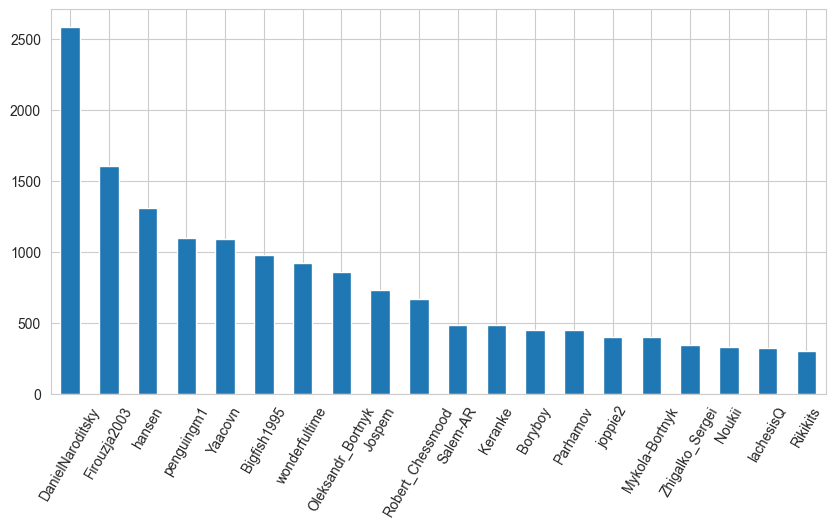

In [ ]:
# Visual insights
opp_count.head(20).plot.bar()